# Inicializar

In [1]:
from Modelos.base_model import base_model
from Modelos.serie_model import serie_model
from Modelos.parallel_model import parallel_model
from Modelos.hybrid_model import hybrid_model
from utils.utils import mostrarResultadosTabla, generate_equidistant_list, graficar_costos_minimizados

from config import *

import math

In [2]:
totalNodes = 9
baseModel = base_model(totalNodes)

Restricted license - for non-production use only - expires 2026-11-23


# Pruebas

## Serie

In [3]:
# Obtener la confiabilidad mínima y máxima obtenibles para el modelo serie
# Hacer una lista de confiabilidades equidistantes entre la mínima y máxima
seriesMaxReliability = RELIABILITY_BY_NODE_TYPE[2] ** totalNodes
seriesRequiredReliabilities = generate_equidistant_list(0, seriesMaxReliability, NUM_EQUIDISTANT_VALUES)

In [4]:
# Crear y optimizar el modelo en serie
try:
    seriesMinCost, seriesVars, seriesModel = serie_model(baseModel, totalNodes, seriesRequiredReliabilities[5])
    mostrarResultadosTabla(totalNodes, seriesMinCost, seriesVars)

except Exception as e:
    print(f"Error: {e}")

Cantidad de Nodos: 9
Resultado de la Optimización:
Costo Total: 188.0
Costo nodos: 108.0
Costo enlaces: 80.0
Nodos activos (x):
   Low Cost  Mid Cost  High Cost
1         0         1          0
2         0         1          0
3         0         1          0
4         0         1          0
5         0         1          0
6         0         1          0
7         0         1          0
8         0         1          0
9         0         1          0


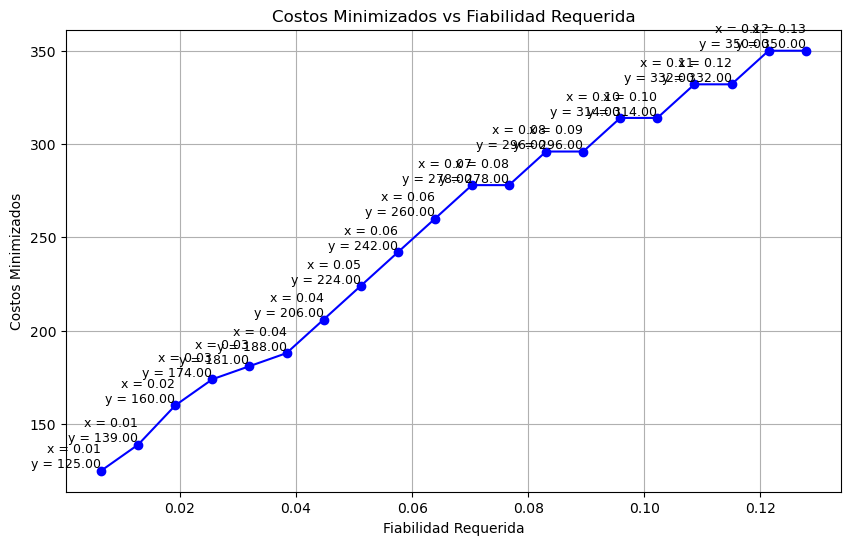

In [5]:
# Graficar los costos minimizados para cada confiabilidad requerida
try:
    serieMinimizedCosts = []
    for reqReliability in seriesRequiredReliabilities:
        minCost, seriesVars, seriesModel = serie_model(baseModel, totalNodes, reqReliability)
        serieMinimizedCosts.append(minCost)
    graficar_costos_minimizados(seriesRequiredReliabilities, serieMinimizedCosts)
except ValueError as e:
    print(f"Error: {e}")

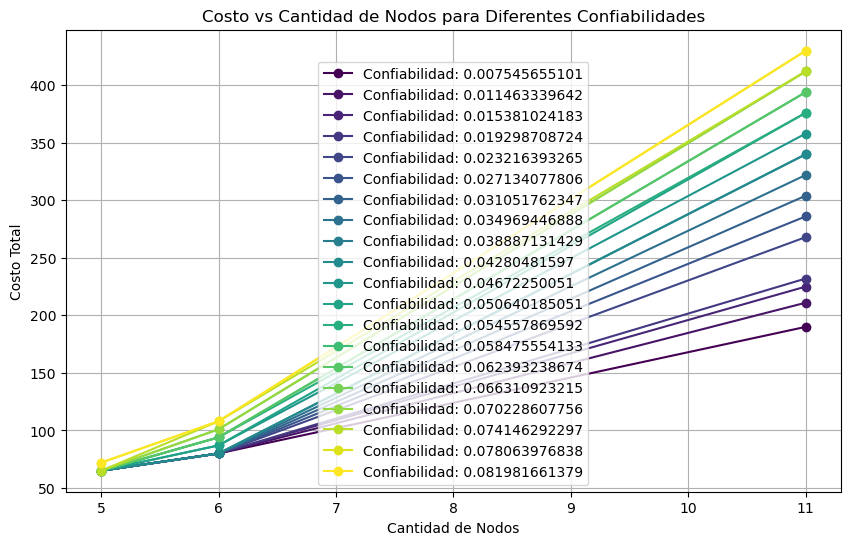

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def grafico_costo_vs_cantidad_nodos_general(costos):
    """
    Genera un gráfico de Costo vs Cantidad de Nodos para una confiabilidad.

    :param costos: Lista de tuplas (nodos, confiabilidad, costo) con los resultados.
    """
    data = pd.DataFrame(costos, columns=['Nodos', 'Confiabilidad', 'Costo'])
    confiabilidades_unicas = sorted(data['Confiabilidad'].unique())
    colores = plt.cm.viridis(np.linspace(0, 1, len(confiabilidades_unicas)))

    plt.figure(figsize=(10, 6))
    for conf, color in zip(confiabilidades_unicas, colores):
        subset = data[data['Confiabilidad'] == conf]
        plt.plot(subset['Nodos'], subset['Costo'], marker='o',
                 linestyle='-', color=color, label=f'Confiabilidad: {conf}')

    plt.title(f"Costo vs Cantidad de Nodos para Diferentes Confiabilidades")
    plt.xlabel("Cantidad de Nodos")
    plt.ylabel("Costo Total")
    plt.grid(True)
    plt.legend()
    plt.show()

costosSerie = [] # Lista para almacenar los costos asociados
tipoNodosSerie = []

seriesMinReliability = RELIABILITY_BY_NODE_TYPE[0] ** 11
seriesMaxReliability = RELIABILITY_BY_NODE_TYPE[2] ** 11
seriesRequiredReliabilities = generate_equidistant_list(seriesMinReliability, seriesMaxReliability, NUM_EQUIDISTANT_VALUES)

for nodos in [5,6,11]:

    for confiabilidad in seriesRequiredReliabilities:
        model_base = base_model(nodos) # Crear modelo base
        minCost, variables, serieModel = serie_model(model_base, nodos, confiabilidad) # Crear modelo serie

        if variables is None:  # Cuando no hay solución
            print(f"No se encontró solución={nodos} y confiabilidad={confiabilidad}")
            costosSerie.append((nodos, confiabilidad, None))
            tipoNodosSerie.append({'Low': 0, 'Medium': 0, 'High': 0})
            continue

        costosSerie.append((nodos, confiabilidad, minCost))# Almacenar resultados de costos

        # Procesar variables de decisión para obtener tipos de nodo
        tipoNodo = {'Low': 0, 'Medium': 0, 'High': 0}
        for var, value in variables.items():
            if var.startswith("x"):
                _, tipo = map(int, var.split('[')[1].split(']')[0].split(','))
                if tipo == 1:
                    tipoNodo['Low'] += int(value)
                elif tipo == 2:
                    tipoNodo['Medium'] += int(value)
                elif tipo == 3:
                    tipoNodo['High'] += int(value)
        tipoNodosSerie.append(tipoNodo)

grafico_costo_vs_cantidad_nodos_general(costosSerie)

## Paralelo

In [13]:
# Obtener la confiabilidad mínima y máxima obtenibles para el modelo en paralelo
# Hacer una lista de confiabilidades equidistantes entre la mínima y máxima
parallelMinReliability = 1 - ((1 - RELIABILITY_BY_NODE_TYPE[0]) ** totalNodes)
parallelMaxReliability = 1 - ((1 - RELIABILITY_BY_NODE_TYPE[2]) ** totalNodes)
parallelRequiredReliabilities = generate_equidistant_list(parallelMinReliability, parallelMaxReliability, NUM_EQUIDISTANT_VALUES)

In [8]:
# Crear y optimizar el modelo en paralelo
try:
    parallelMinCost, parallelVars, parallelModel = parallel_model(baseModel, totalNodes, parallelRequiredReliabilities[5])
    mostrarResultadosTabla(totalNodes, parallelMinCost, parallelVars)
except Exception as e:
    print(f"Error: {e}")

Cantidad de Nodos: 9
Resultado de la Optimización:
Costo Total: 405.0
Costo nodos: 45.0
Costo enlaces: 360.0
Nodos activos (x):
   Low Cost  Mid Cost  High Cost
1         1         0          0
2         1         0          0
3         1         0          0
4         1         0          0
5         1         0          0
6         1         0          0
7         1         0          0
8         1         0          0
9         1         0          0


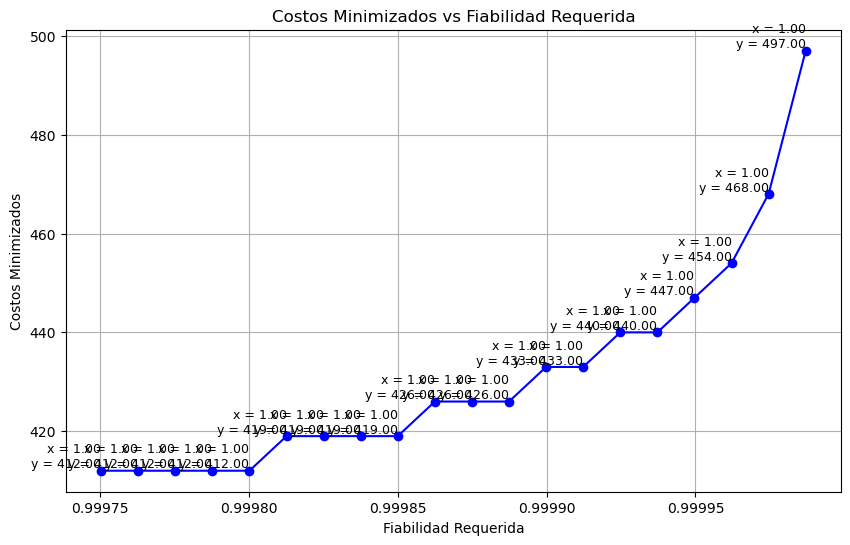

In [14]:
# Graficar los costos minimizados para cada confiabilidad requerida
try:
    parallelMinimizedCosts = []
    for reqReliability in parallelRequiredReliabilities:
        minCost, parallelVars, parallelModel = parallel_model(baseModel, totalNodes, reqReliability)
        parallelMinimizedCosts.append(minCost)
    graficar_costos_minimizados(parallelRequiredReliabilities, parallelMinimizedCosts)
except ValueError as e:
    print(f"Error: {e}")

## Hibrido

In [10]:
# Obtener la confiabilidad mínima y máxima obtenibles para el modelo hibrido
# Hacer una lista de confiabilidades equidistantes entre la mínima y máxima
hybridMaxReliability = RELIABILITY_BY_NODE_TYPE[2] if totalNodes < 6 else 1
hybridRequiredReliabilities = generate_equidistant_list(0, hybridMaxReliability, NUM_EQUIDISTANT_VALUES)

In [11]:
# Crear y optimizar el modelo híbrido
try:
    reqRel = hybridRequiredReliabilities[0]
    hybridMinCost, hybridVars, hybridModel = hybrid_model(baseModel, totalNodes, reqRel)
    print("Confiabilidad requerida:", reqRel)
    mostrarResultadosTabla(totalNodes, hybridMinCost, hybridVars, "hibrido")
    confiabilidadAlcanzada = math.exp(hybridVars["TotalReliability"])
    print("Confiabilidad alcanza:", str(confiabilidadAlcanzada))
    # for var in hybridVars:
    #     if not var.startswith("x") and not var.startswith("y"):
    #         print(f"Variable {var}: {hybridVars[var]}")
except Exception as e:
    print(f"Error: {e}")

Confiabilidad requerida: 0.047619047619
Cantidad de Nodos: 9
Resultado de la Optimización:
Costo Total: 155.0
Costo nodos: 45.0
Costo enlaces: 110.0
Nodos activos (x):
   Low Cost  Mid Cost  High Cost
1         1         0          0
2         1         0          0
3         1         0          0
4         1         0          0
5         1         0          0
6         1         0          0
7         1         0          0
8         1         0          0
9         1         0          0
Nodos activos (y):
   Subred 0  Subred 1  Subred 2  Subred 3
1         0         0         1         0
2         0         1         0         0
3         0         0         0         1
4         0         0         1         0
5         0         0         0         1
6         0         0         1         0
7         0         0         0         1
8         0         1         0         0
9         0         1         0         0
Confiabilidad alcanza: 0.8200258560000063


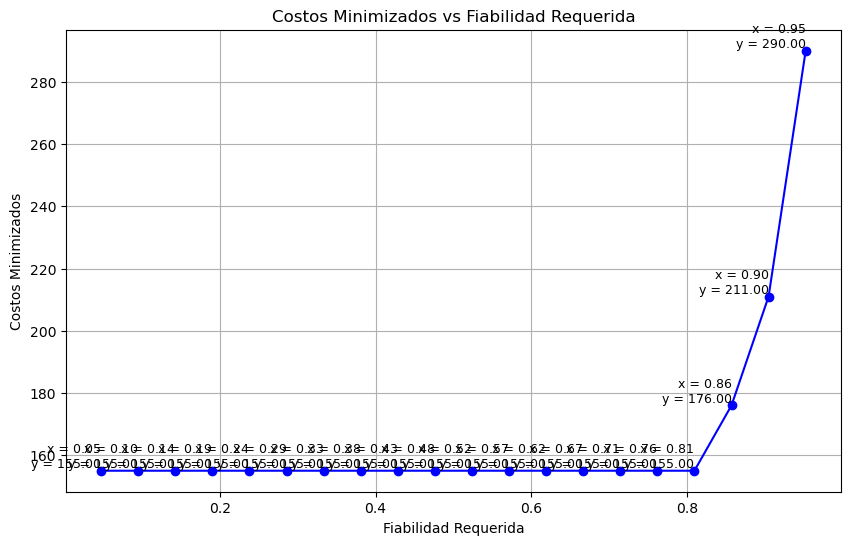

In [12]:
# Graficar los costos minimizados para cada confiabilidad requerida
try:
    hybridMinimizedCosts = []
    for reqReliability in hybridRequiredReliabilities:
        minCost, hybridVars, hybridModel = hybrid_model(baseModel, totalNodes, reqReliability)
        hybridMinimizedCosts.append(minCost)
    graficar_costos_minimizados(hybridRequiredReliabilities, hybridMinimizedCosts)
except ValueError as e:
    print(f"Error: {e}")

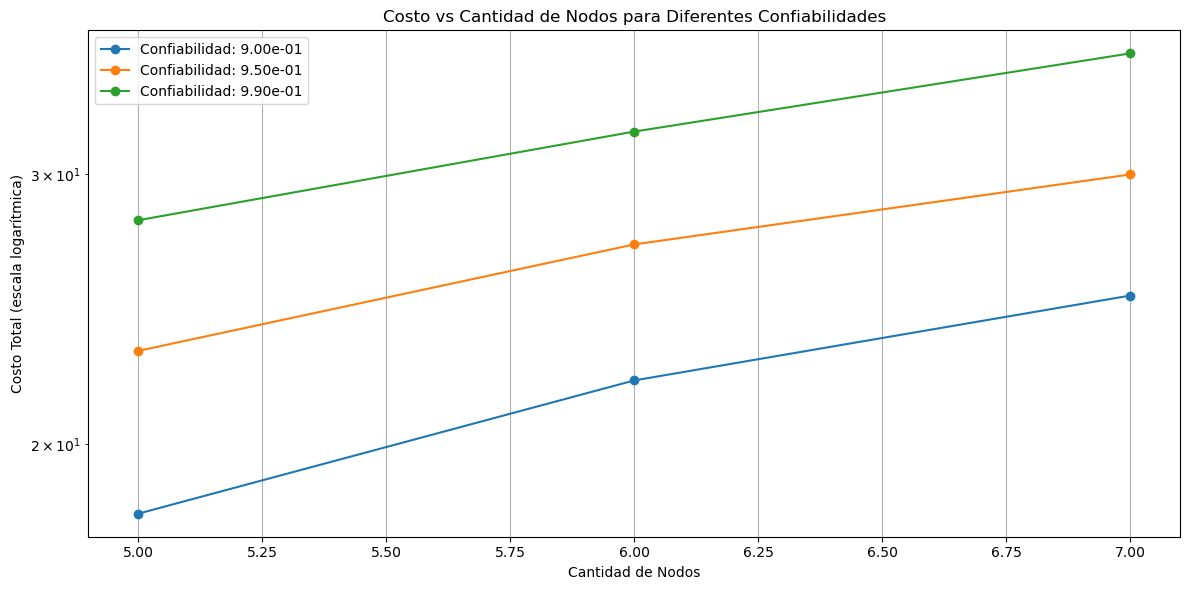

In [14]:
from utils.utils import graficar_costos_totales
# Datos de prueba
confiabilidades = [0.90, 0.95, 0.99]
cantidades_nodos = [5, 6, 7]

costos_totales = [
    18, 22, 25,     # para 0.90
    23, 27, 30,     # para 0.95
    28, 32, 36      # para 0.99
]

graficar_costos_totales(confiabilidades, cantidades_nodos, costos_totales)

In [ ]:

# Listas de entrada (en el mismo orden que se usaron en product(confiabilidades, cantidades_nodos))
confiabilidades = [0.55, 0.75, 0.89]
cantidades_nodos = [5, 6, 11]

# Lista de variables de decisión simuladas, como las retornaría un modelo (solo para este ejemplo)
decision_sets = [
    {'x[0,0]': 1.0, 'x[1,0]': 1.0, 'x[2,1]': 1.0, 'x[3,1]': 1.0, 'x[4,2]': 1.0},
    {'x[0,1]': 1.0, 'x[1,1]': 1.0, 'x[2,1]': 1.0, 'x[3,0]': 1.0, 'x[4,0]': 1.0, 'x[5,2]': 1.0},
    {'x[0,2]': 1.0, 'x[1,2]': 1.0, 'x[2,1]': 1.0, 'x[3,0]': 1.0, 'x[4,0]': 1.0, 'x[5,1]': 1.0, 'x[6,1]': 1.0, 'x[7,0]': 1.0, 'x[8,0]': 1.0, 'x[9,0]': 1.0, 'x[10,0]': 1.0},

    {'x[0,0]': 1.0, 'x[1,0]': 1.0, 'x[2,1]': 1.0, 'x[3,1]': 1.0, 'x[4,2]': 1.0},
    {'x[0,0]': 1.0, 'x[1,1]': 1.0, 'x[2,2]': 1.0, 'x[3,1]': 1.0, 'x[4,0]': 1.0, 'x[5,0]': 1.0},
    {'x[0,2]': 1.0, 'x[1,1]': 1.0, 'x[2,0]': 1.0, 'x[3,0]': 1.0, 'x[4,0]': 1.0, 'x[5,1]': 1.0, 'x[6,0]': 1.0, 'x[7,0]': 1.0, 'x[8,0]': 1.0, 'x[9,2]': 1.0, 'x[10,2]': 1.0},

    {'x[0,1]': 1.0, 'x[1,1]': 1.0, 'x[2,1]': 1.0, 'x[3,0]': 1.0, 'x[4,0]': 1.0},
    {'x[0,1]': 1.0, 'x[1,2]': 1.0, 'x[2,0]': 1.0, 'x[3,1]': 1.0, 'x[4,0]': 1.0, 'x[5,0]': 1.0},
    {'x[0,2]': 1.0, 'x[1,1]': 1.0, 'x[2,1]': 1.0, 'x[3,1]': 1.0, 'x[4,1]': 1.0, 'x[5,1]': 1.0, 'x[6,1]': 1.0, 'x[7,0]': 1.0, 'x[8,0]': 1.0, 'x[9,0]': 1.0, 'x[10,0]': 1.0},
]


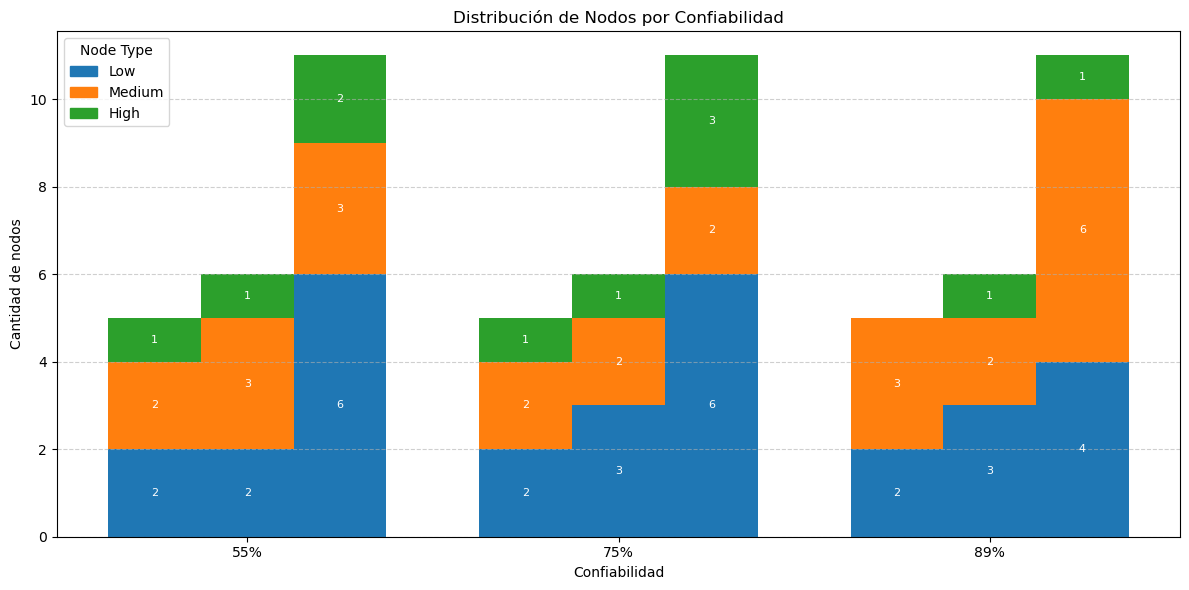

In [ ]:
from utils.utils import graficar_distribucion_apilada

graficar_distribucion_apilada(
    confiabilidades=confiabilidades,
    cantidades_nodos=cantidades_nodos,
    decision_sets=decision_sets
)
